In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#lendo o arquivo Excel
arquivo = 'Case.xlsx'

In [3]:
# importando a planilha Base do arquivo Excel
df = pd.read_excel(arquivo, sheet_name='Base')

In [4]:
#Lendo as primeiras linhas do DataFrame
df.head()

,Aluno,Transação,Produto,Forma Pagamento,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela),Data Compra
0,Aluno1,HP033154662,Excel,BoletoBancario,1,1,597.00,2019-01-04
1,Aluno2,HP131154688,Excel,CartaoDeCredito,1,1,696.96,2019-01-07
2,Aluno3,HP109154696,Excel,CartaoDeCredito,1,1,792.65,2019-01-08
3,Aluno4,HP185154697,Excel,CartaoDeCredito,1,1,696.96,2019-01-08
4,Aluno5,HP133154697,Excel,CartaoDeCredito,1,1,696.99,2019-01-08


In [5]:
#Exibindo informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71005 entries, 0 to 71004
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Aluno                       71005 non-null  object        
 1   Transação                   71005 non-null  object        
 2   Produto                     71005 non-null  object        
 3   Forma Pagamento             71005 non-null  object        
 4   Num Parcela Atual           71005 non-null  int64         
 5   Total Parcelas a Pagar      71005 non-null  int64         
 6   Valor Pago (nessa parcela)  71005 non-null  float64       
 7   Data Compra                 71005 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.3+ MB


In [6]:
#Exibindo estatísticas descritivas do DataFrame
df.describe()

,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela),Data Compra
count,71005.000000,71005.000000,71005.000000,71005
mean,2.620083,3.133681,402.722066,2020-11-16 14:52:25.975635456
min,1.000000,1.000000,2.410000,2019-01-04 00:00:00
25%,1.000000,1.000000,77.650000,2020-06-21 00:00:00
50%,1.000000,1.000000,497.000000,2020-12-16 00:00:00
75%,3.000000,1.000000,650.100000,2021-05-03 00:00:00
max,12.000000,12.000000,2334.720000,2022-09-15 00:00:00
std,2.860485,4.235443,323.855943,NaN


In [7]:
#Exibindo a quantidade de valores nulos em cada coluna do DataFrame
df.isnull().sum()

Aluno                         0
Transação                     0
Produto                       0
Forma Pagamento               0
Num Parcela Atual             0
Total Parcelas a Pagar        0
Valor Pago (nessa parcela)    0
Data Compra                   0
dtype: int64

### 1. % Recompra (de todos os alunos, quantos % compraram pelo menos 2 cursos)


In [8]:
# Agrupando por Aluno e Total de Parcelas a Pagar
quantidade_de_produtos_por_aluno = df.groupby('Aluno')['Produto'].nunique()
quantidade_de_produtos_por_aluno 

Aluno
Aluno1        1
Aluno10       3
Aluno100      1
Aluno1000     2
Aluno10000    1
             ..
Aluno9995     3
Aluno9996     3
Aluno9997     5
Aluno9998     1
Aluno9999     1
Name: Produto, Length: 34959, dtype: int64

In [9]:
aluno_mais_de_um_curso = quantidade_de_produtos_por_aluno[quantidade_de_produtos_por_aluno > 1]
aluno_mais_de_um_curso


Aluno
Aluno10       3
Aluno1000     2
Aluno10003    2
Aluno10005    2
Aluno10006    2
             ..
Aluno9992     2
Aluno9993     2
Aluno9995     3
Aluno9996     3
Aluno9997     5
Name: Produto, Length: 7933, dtype: int64

In [10]:
# Calculando o percentual de alunos que compraram mais de um curso
percentual_recompra = (len(aluno_mais_de_um_curso) / len(df['Aluno'].unique())) * 100
print(f"Percentual de alunos que compraram mais de um curso: {percentual_recompra:.2f}%")

Percentual de alunos que compraram mais de um curso: 22.69%


In [11]:
total_de_alunos_unicos = len(quantidade_de_produtos_por_aluno)
total_de_alunos_unicos

34959

In [12]:
# Criando um DataFrame para os dados do gráfico
dados_grafico = pd.DataFrame({
    'Tipo de Lunos': ['Alunos com Mais de Um Produto', 'Alunos com Apenas Um Produto'],
    'Quantidade': [len(aluno_mais_de_um_curso), total_de_alunos_unicos]
})

In [13]:
dados_grafico.head()


,Tipo de Lunos,Quantidade
0,Alunos com Mais de Um Produto,7933
1,Alunos com Apenas Um Produto,34959


In [14]:
# Configurando o estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

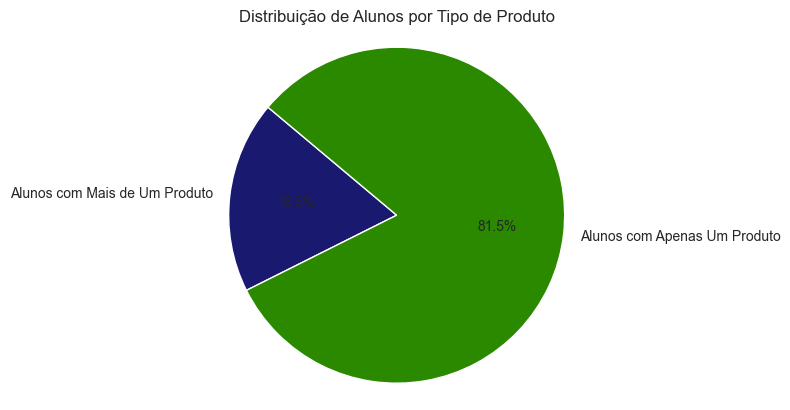

In [15]:
plt.pie(dados_grafico['Quantidade'], labels=dados_grafico['Tipo de Lunos'], autopct='%1.1f%%', startangle=140, colors=['#191970', '#2b8900'])
plt.title('Distribuição de Alunos por Tipo de Produto')
plt.axis('equal')
plt.show()

## 2. Quantidade e % de alunos que compraram 1 produto, que compraram 2 produtos, que compraram 3 produtos, e por aí vai


In [16]:
df.head()

,Aluno,Transação,Produto,Forma Pagamento,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela),Data Compra
0,Aluno1,HP033154662,Excel,BoletoBancario,1,1,597.00,2019-01-04
1,Aluno2,HP131154688,Excel,CartaoDeCredito,1,1,696.96,2019-01-07
2,Aluno3,HP109154696,Excel,CartaoDeCredito,1,1,792.65,2019-01-08
3,Aluno4,HP185154697,Excel,CartaoDeCredito,1,1,696.96,2019-01-08
4,Aluno5,HP133154697,Excel,CartaoDeCredito,1,1,696.99,2019-01-08


In [17]:
# Calculando a distribuição de produtos
# e ordenando por índice
distribuicao_produtos = df['Produto'].value_counts().sort_index()
distribuicao_produtos

Produto
Apresentações         374
AutoCAD               674
Ciência de Dados      662
Currículo             295
Excel               30699
Power BI            19851
Python               9243
SQL                  1190
VBA                  8017
Name: count, dtype: int64

In [18]:
total_de_alunos_unicos

34959

In [19]:
porcertagem_distribuição_produtos = (distribuicao_produtos / total_de_alunos_unicos) * 100
porcertagem_distribuição_produtos

Produto
Apresentações        1.069825
AutoCAD              1.927973
Ciência de Dados     1.893647
Currículo            0.843846
Excel               87.814297
Power BI            56.783661
Python              26.439543
SQL                  3.403988
VBA                 22.932578
Name: count, dtype: float64

In [20]:
# Criando um DataFrame para porcentagens
df_porcentagem = porcertagem_distribuição_produtos.reset_index()
df_porcentagem.columns = ['Produto', 'Porcentagem']
# Exibindo o DataFrame com porcentagens
df_porcentagem


,Produto,Porcentagem
0,Apresentações,1.069825
1,AutoCAD,1.927973
2,Ciência de Dados,1.893647
3,Currículo,0.843846
4,Excel,87.814297
5,Power BI,56.783661
6,Python,26.439543
7,SQL,3.403988
8,VBA,22.932578


C:\Users\Casa\AppData\Local\Temp\ipykernel_6824\635353017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto', y='Porcentagem', data=df_porcentagem, palette='viridis')


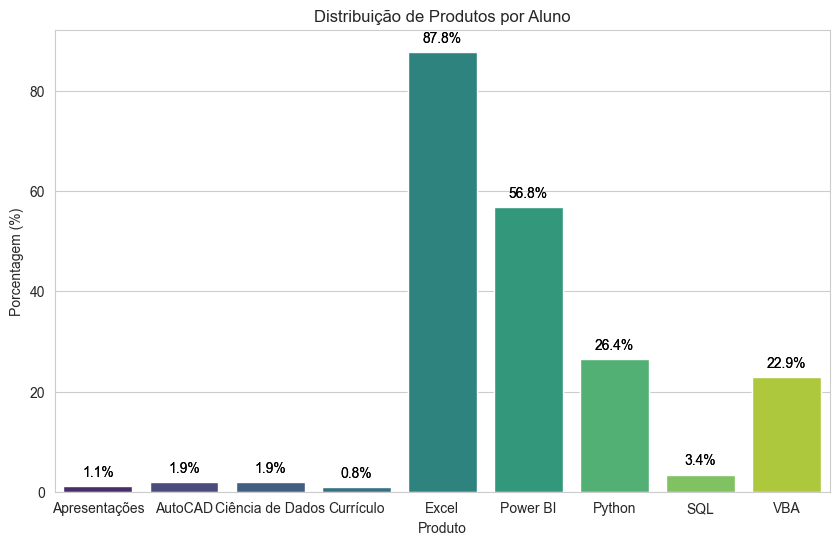

In [21]:
# Plotando o gráfico de barras
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Porcentagem', data=df_porcentagem, palette='viridis')
ax = sns.barplot(x='Produto', y='Porcentagem', data=df_porcentagem,palette='viridis', hue='Produto', legend=False)

# Adicionando rótulos de porcentagem acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=10, color='black')
plt.title('Distribuição de Produtos por Aluno')
plt.xlabel('Produto')
plt.ylabel('Porcentagem (%)')
plt.show()

## 3. Calcule a Inadimplência das vendas da seguinte forma:

* Existem as vendas à vista e vendas parceladas 

* A ideia é que você pegue só as vendas parceladas e veja: qual é o valor total que deveria ser pago, qual é o valor total que de fato foi pago e o % que ficou faltando (a inadimplência)

* E lembrando, esses números só considerando vendas parceladas, tirando da conta vendas à vista

In [22]:
df.head()

,Aluno,Transação,Produto,Forma Pagamento,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela),Data Compra
0,Aluno1,HP033154662,Excel,BoletoBancario,1,1,597.00,2019-01-04
1,Aluno2,HP131154688,Excel,CartaoDeCredito,1,1,696.96,2019-01-07
2,Aluno3,HP109154696,Excel,CartaoDeCredito,1,1,792.65,2019-01-08
3,Aluno4,HP185154697,Excel,CartaoDeCredito,1,1,696.96,2019-01-08
4,Aluno5,HP133154697,Excel,CartaoDeCredito,1,1,696.99,2019-01-08


In [23]:
# Filtrando as colunas relevantes para o parcelamento
df_parcelamento = df[['Aluno', 'Num Parcela Atual', 'Total Parcelas a Pagar', 'Valor Pago (nessa parcela)']].copy()

In [24]:
df_parcelamento.head()

,Aluno,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela)
0,Aluno1,1,1,597.00
1,Aluno2,1,1,696.96
2,Aluno3,1,1,792.65
3,Aluno4,1,1,696.96
4,Aluno5,1,1,696.99


In [25]:
# Agrupando por Aluno e Total de Parcelas a Pagar > 1
df_parcelamento = df_parcelamento[df_parcelamento['Total Parcelas a Pagar'] > 1].copy()
df_parcelamento

,Aluno,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela)
18146,Aluno14560,1,10,5.68
18158,Aluno14571,1,3,57.99
18176,Aluno14588,1,12,4.85
18185,Aluno14597,1,5,25.69
18196,Aluno14607,1,12,4.85
...,...,...,...,...
70993,Aluno22019,5,6,32.38
70995,Aluno6667,5,12,4.85
70999,Aluno29451,3,6,25.88
71001,Aluno32493,1,12,6.47


In [26]:
total_pago = df_parcelamento['Valor Pago (nessa parcela)'].sum()
total_pago

np.float64(139261.52)

In [27]:
# Agrupando por Aluno e Total de Parcelas a Pagar
df_parcelamento_sem_duplicatas = df_parcelamento.drop_duplicates(subset=['Aluno', 'Total Parcelas a Pagar', 'Valor Pago (nessa parcela)'])
df_parcelamento_sem_duplicatas

,Aluno,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela)
18146,Aluno14560,1,10,5.68
18158,Aluno14571,1,3,57.99
18176,Aluno14588,1,12,4.85
18185,Aluno14597,1,5,25.69
18196,Aluno14607,1,12,4.85
...,...,...,...,...
70881,Aluno33723,1,12,12.15
70896,Aluno4215,1,12,12.15
70906,Aluno34029,1,5,64.43
70915,Aluno31569,1,6,64.85


In [28]:
# Inserindo uma nova coluna com o valor total previsto por venda
df_parcelamento_sem_duplicatas['Valor Total Previsto por Venda'] = df_parcelamento_sem_duplicatas['Total Parcelas a Pagar'] * df_parcelamento_sem_duplicatas['Valor Pago (nessa parcela)']
df_parcelamento_sem_duplicatas

C:\Users\Casa\AppData\Local\Temp\ipykernel_6824\1553808048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parcelamento_sem_duplicatas['Valor Total Previsto por Venda'] = df_parcelamento_sem_duplicatas['Total Parcelas a Pagar'] * df_parcelamento_sem_duplicatas['Valor Pago (nessa parcela)']


,Aluno,Num Parcela Atual,Total Parcelas a Pagar,Valor Pago (nessa parcela),Valor Total Previsto por Venda
18146,Aluno14560,1,10,5.68,56.80
18158,Aluno14571,1,3,57.99,173.97
18176,Aluno14588,1,12,4.85,58.20
18185,Aluno14597,1,5,25.69,128.45
18196,Aluno14607,1,12,4.85,58.20
...,...,...,...,...,...
70881,Aluno33723,1,12,12.15,145.80
70896,Aluno4215,1,12,12.15,145.80
70906,Aluno34029,1,5,64.43,322.15
70915,Aluno31569,1,6,64.85,389.10


In [29]:
total_receber = df_parcelamento_sem_duplicatas['Valor Total Previsto por Venda'].sum()

print(f'Total à receber: {total_receber:.2f}')
print(f'Total pago:{total_pago:.2f}')

Total à receber: 161222.40
Total pago:139261.52


In [30]:
falta_receber = total_receber - total_pago
print(f'Falta receber: {falta_receber:.2f}')

Falta receber: 21960.88


In [31]:
# % Inadimplência
inadimplencia = (falta_receber / total_receber) * 100
print(f'Percentual de inadimplência: {inadimplencia:.2f}%')

Percentual de inadimplência: 13.62%


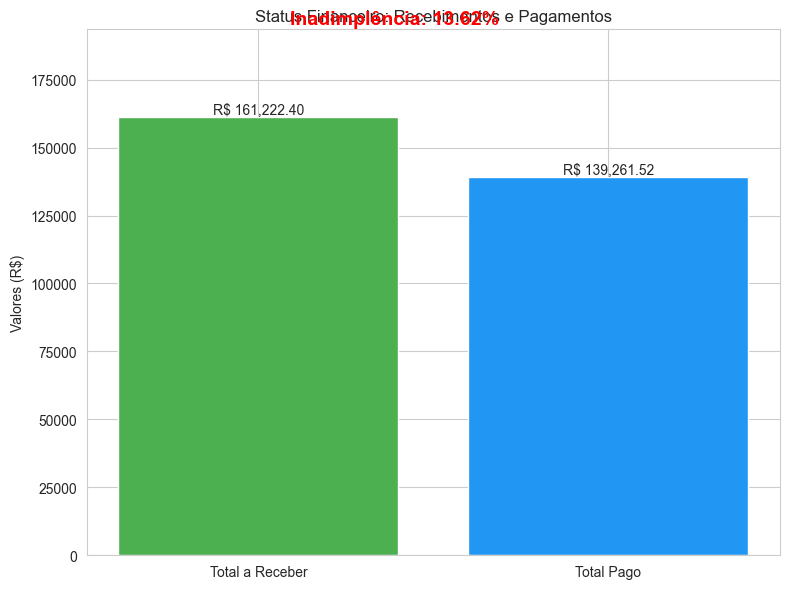

In [33]:
# --- Configurações do Gráfico ---
labels = ['Total a Receber', 'Total Pago']
valores = [total_receber, total_pago]
cores = ['#4CAF50', '#2196F3'] # Verde para "a receber", Azul para "pago"

fig, ax = plt.subplots(figsize=(8, 6))

# Cria as barras
barras = ax.bar(labels, valores, color=cores)

# Adiciona os valores nas barras
for bar in barras:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 100, f'R$ {yval:,.2f}', ha='center', va='bottom', fontsize=10)

# Adiciona o título e rótulos
ax.set_ylabel('Valores (R$)')
ax.set_title('Status Financeiro: Recebimentos e Pagamentos')
ax.set_ylim(0, max(total_receber, total_pago) * 1.2) # Ajusta o limite Y para ter espaço para os rótulos

# Adiciona a informação da inadimplência em porcentagem como texto no gráfico
plt.figtext(0.5, 0.95, f'Inadimplência: {inadimplencia:.2f}%',
            fontsize=14, ha='center', color='red', weight='bold')

# Melhora o layout e mostra o gráfico
plt.tight_layout()
plt.show()